# Solving Kirchhoff's law ordinary differential equation

Import packages...

In [7]:
from sympy import *
#pacote para desenhar circuitos
import SchemDraw as schem
import SchemDraw.elements as e

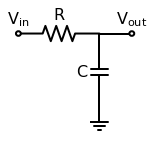

In [8]:
d = schem.Drawing(unit=2.5)
d.add(e.DOT_OPEN, label ='$V_{in}$')
comp1 =d.add(e.RES, d='right',label='$R$') #capacitor
d.add(e.CAP, d='down',label='$C$') # resistor de saída
d.add(e.GND)
#output
d.add(e.LINE, d='right', xy=comp1.end, l=1)
d.add(e.DOT_OPEN,label ='$V_{out}$')
#---
d.draw()

Escrevendo a lei de Kirchhoff para o circuito da figura acima,
$$
\frac{dq}{dt}+\frac{1}{\tau}q=\frac{v_{in}(t)}{R}.
$$ (eq:kvl)

Exploraremos o pacote ```sympy``` para nos ajudar a resolver esta equação diferencial ordinária.

## Defining **symbols** and equation to be solved

A solução tentantiva será na forma,
$$ q(t)=A \cos(\omega t)+B*\sin(\omega t)
$$ (eq:trial)

In [73]:
A,B,omega,t, tau = symbols('A B omega t tau')
qtrial= A*cos(omega*t)+B*sin(omega*t)

In [74]:
lhs = diff(qtrial,t)+1/tau*qtrial 

In [75]:
v0, R = symbols('v0 R')
rhs = v0/R*cos(omega*t)

In [76]:
eq = lhs-rhs
simplify(lhs)

(A*cos(omega*t) + B*sin(omega*t) + omega*tau*(-A*sin(omega*t) + B*cos(omega*t)))/tau

In [77]:
terms = [sin(omega*t),cos(omega*t)]
eqlhs=collect(simplify(eq),terms)


In [78]:
coefs = [eqlhs.coeff(term) for term in terms]
coefs

[-A*omega + B/tau, A/tau + B*omega - v0/R]

In [79]:
eq2 = [Eq(coef,0) for coef in coefs]
solution, = linsolve(eq2,(A,B))

In [80]:
sol = solution[0]*terms[0] + solution[1]*terms[1]
simplify(sol)

tau*v0*(omega*tau*cos(omega*t) + sin(omega*t))/(R*(omega**2*tau**2 + 1))

In [81]:
print_latex(simplify(sol))

\frac{\tau v_{0} \left(\omega \tau \cos{\left(\omega t \right)} + \sin{\left(\omega t \right)}\right)}{R \left(\omega^{2} \tau^{2} + 1\right)}


Therefore, the solution is:
$$q(t) = \frac{\tau v_{0} \left(\omega \tau \cos{\left(\omega t \right)} + \sin{\left(\omega t \right)}\right)}{R \left(\omega^{2} \tau^{2} + 1\right)}
$$

#Another form....
Equivalently we could solve directly for the electric current $i=dq/dt$, $$\frac{di}{dt}+\frac{1}{\tau}i=\frac{1}{R}\frac{d v_{in}(t)}{dt}$$

In [64]:
A,B,omega,t, tau = symbols('A B omega t tau')
itrial= A*cos(omega*t)+B*sin(omega*t)

In [82]:
lhs = diff(itrial,t)+1/tau*itrial

In [83]:
v0, R = symbols('v0 R')
rhs = diff(v0/R*cos(omega*t),t)

In [84]:
eq = lhs-rhs
simplify(lhs)

(A*cos(omega*t) + B*sin(omega*t) + omega*tau*(-A*sin(omega*t) + B*cos(omega*t)))/tau

In [85]:
terms = [sin(omega*t),cos(omega*t)]
eqlhs=collect(simplify(eq),terms)


In [86]:
coefs = [eqlhs.coeff(term) for term in terms]
coefs

[-A*omega + B/tau + omega*v0/R, A/tau + B*omega]

In [87]:
eq2 = [Eq(coef,0) for coef in coefs]
solution, = linsolve(eq2,(A,B))

In [88]:
sol = solution[0]*terms[0] + solution[1]*terms[1]
simplify(sol)

omega*tau*v0*(omega*tau*sin(omega*t) - cos(omega*t))/(R*(omega**2*tau**2 + 1))

In [89]:
print_latex(simplify(sol))

\frac{\omega \tau v_{0} \left(\omega \tau \sin{\left(\omega t \right)} - \cos{\left(\omega t \right)}\right)}{R \left(\omega^{2} \tau^{2} + 1\right)}
